In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import pandas as pd
import community
from community import community_louvain
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

### **1. Karate Club**

In [ ]:
K = nx.karate_club_graph()

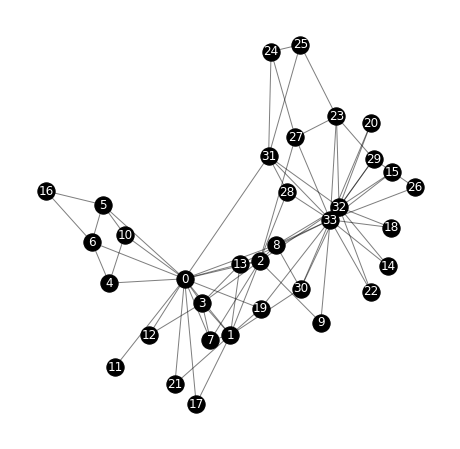

In [ ]:
pos = nx.fruchterman_reingold_layout(K);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(K, pos, node_size=300, node_color="black");
nx.draw_networkx_edges(K, pos, alpha=0.500);
nx.draw_networkx_labels(K, pos, font_color="white");


plt.show();

In [ ]:
network_name = K

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
#print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

Nodes:  34
Edges:  78
Average degree:  4.588235294117647
Minimum degree:  1
Maximum degree:  17
Average Network Clustering:  0.5706384782076823
Average Path length:  2.408199643493761
Network Diameter:  5


In [ ]:
clustering_dict

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

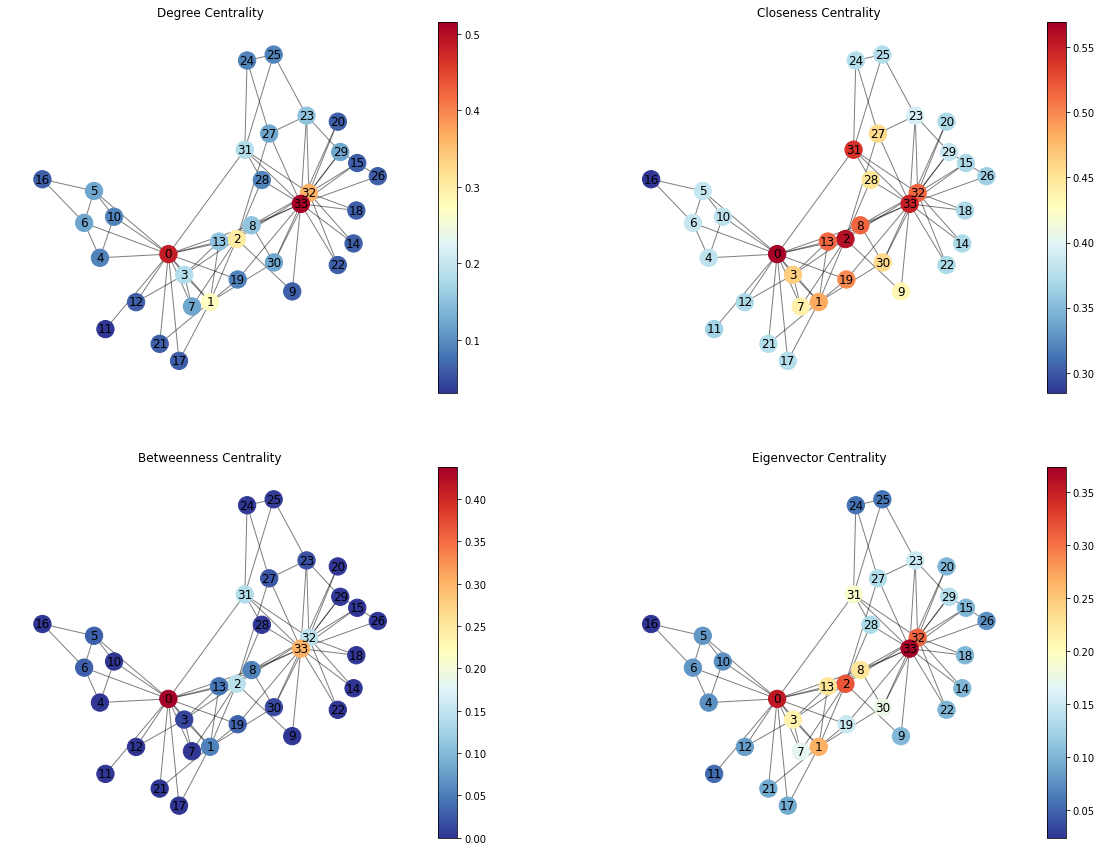

In [ ]:
network_name = K

fig = plt.figure(figsize=(20,15)); #create/define a canvass

centralities = [list(nx.degree_centrality(network_name).values()), 
                list(nx.closeness_centrality(network_name).values()), 
                list(nx.betweenness_centrality(network_name).values()),
                list(nx.eigenvector_centrality(network_name).values())]
                
titles = ['Degree Centrality', 'Closeness Centrality', 
          'Betweenness Centrality', 'Eigenvector Centrality']

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1); #position of the nodes, if odd -> right side

    nc = nx.draw_networkx_nodes(network_name, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                            node_color=centralities[i]); #node color, node color is the centrality of i
    nx.draw_networkx_edges(network_name, pos, alpha=0.500); #draw edges
    nx.draw_networkx_labels(network_name, pos, font_color='black'); #draw labels
    plt.title(titles[i]);
    plt.axis('off');
    plt.colorbar(nc);

plt.show();

### Network Insights

Based on the degree of centrality, Nodes 0 and 33 have the most connections in the network. Approximately 90% of the nodes are shaded blue, which suggests that the majority of the members have a small number of links in the club. 

Node 0 also had the highest betweenness centrality in the network. It is the most included node in all shortest paths between two unrelated members. Node 33 follows Node 1 in terms of betweenness centrality. These two nodes are the most influential in information flow in the club. The other members in the Karate club network had a low degree of betweenness centrality (0.15 and below), which could imply their dependence on Nodes 0 and 33 to gather information about the Karate Club.

Four nodes are central in the network based on closeness. These are Nodes 0, 33, 2, and 31. These members can spread information efficiently due to their nearness to all the other members. Nodes 0 and 33 had the highest eigenvector centralities. Their connections with other important nodes make them central in the network. 

Nodes 0 and 33 are central members across all measures. The local clustering coefficient of these two nodes is 0.15 and 0.11, respectively. This means that these individuals are powerful in the Karate club, as their connections lack links with each other. The average number of connections of each member is only 4.58. The disproportionate power that these individuals have and the lack of pairwise connections among the other members may have led to the eventual splitting of the Karate club into two groups. 













### **2. Florentine**


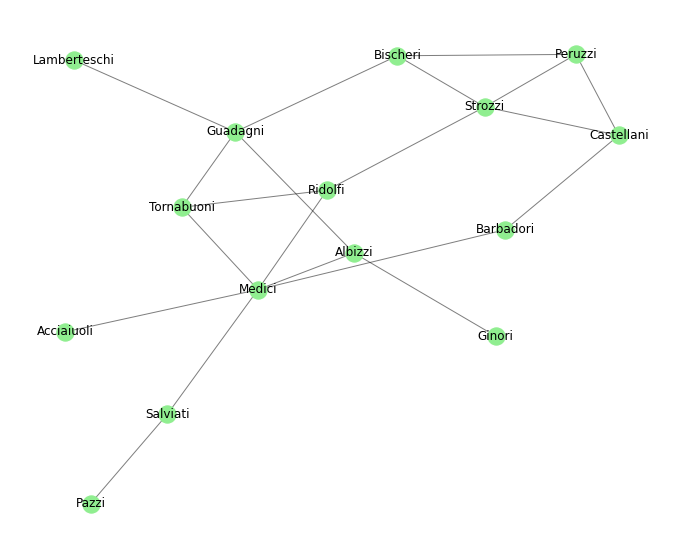

In [ ]:
F = nx.florentine_families_graph() 
pos = nx.fruchterman_reingold_layout(F);

plt.figure(figsize=(12,10));
plt.axis("off");
nx.draw_networkx_nodes(F, pos, node_size=300, node_color="lightgreen");
nx.draw_networkx_edges(F, pos, alpha=0.500);
nx.draw_networkx_labels(F, pos, font_color='black');
plt.show();

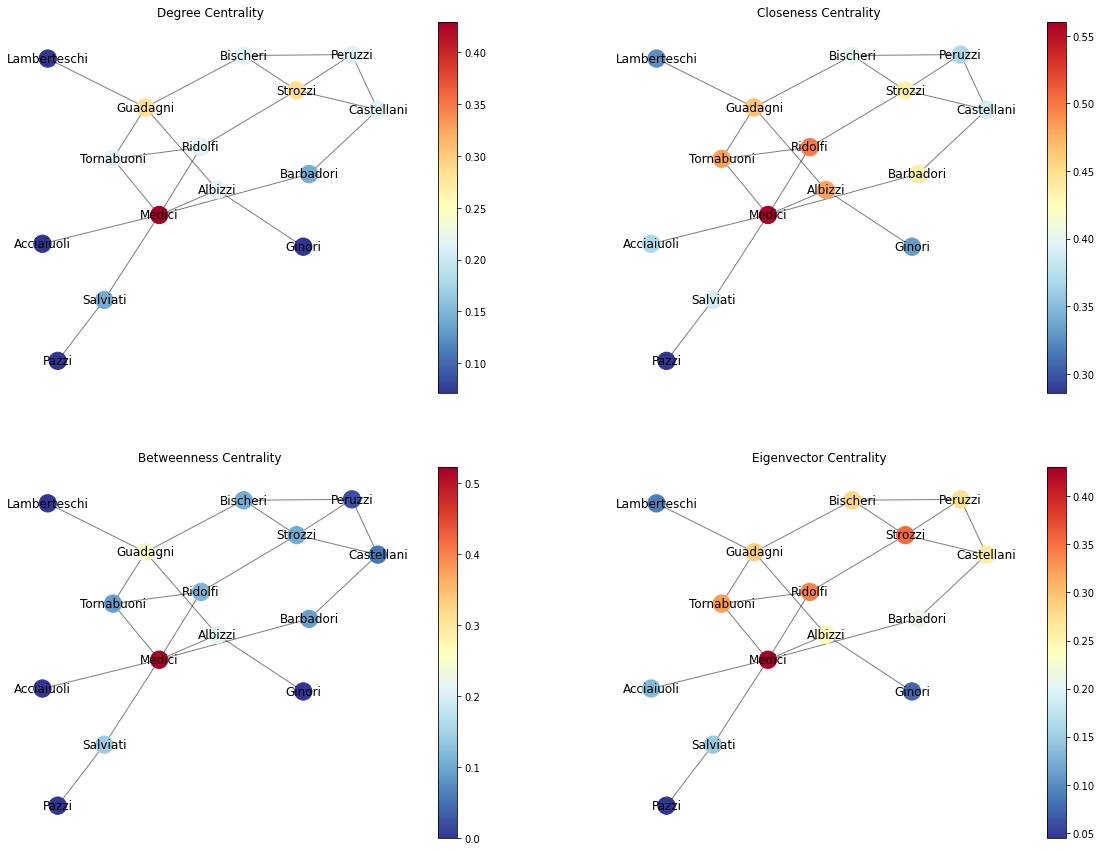

In [ ]:
network_name = F

fig = plt.figure(figsize=(20,15)); #create/define a canvass

centralities = [list(nx.degree_centrality(network_name).values()), 
                list(nx.closeness_centrality(network_name).values()), 
                list(nx.betweenness_centrality(network_name).values()),
                list(nx.eigenvector_centrality(network_name).values())]
                
titles = ['Degree Centrality', 'Closeness Centrality', 
          'Betweenness Centrality', 'Eigenvector Centrality']

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1); #position of the nodes, if odd -> right side

    nc = nx.draw_networkx_nodes(network_name, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                            node_color=centralities[i]); #node color, node color is the centrality of i
    nx.draw_networkx_edges(network_name, pos, alpha=0.500); #draw edges
    nx.draw_networkx_labels(network_name, pos, font_color='black'); #draw labels
    plt.title(titles[i]);
    plt.axis('off');
    plt.colorbar(nc);

plt.show();

### Network Insights

The Medici family is the most central node in the Florentine network, across all centrality measures. Most families have a degree centrality of 0.1 to 0.3, while Medici has an unusually high number of connections at 0.4. Medici is also most influential in facilitating information flow. Approximately 80% of the network had a betweenness centrality of below 0.2, suggesting a low degree of inclusion in the network to link two unrelated nodes. Meanwhile, the closeness centrality identified Medici and Ridolfi families to be influential in spreading information efficiently because of their nearness to all the other nodes. Medici also had the highest eigenvector centrality, suggesting its strong ties with other influential nodes. 

Five families were consistently at the network's periphery for all measures. These are Pazzi, Gnori, Acciaioulli, Lamberteschi, and Salviati. How this impacts their economic standing and business operations could be investigated further.

### **3. MSDS Hangout Network**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/Colab Notebooks/data/netsci_datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
msds = pd.read_pickle(data_dir+'class-map.pkl')

In [ ]:
G_msds = nx.Graph(msds)

In [ ]:
G_msds.remove_edges_from(nx.selfloop_edges(G_msds)) #remove self-loops

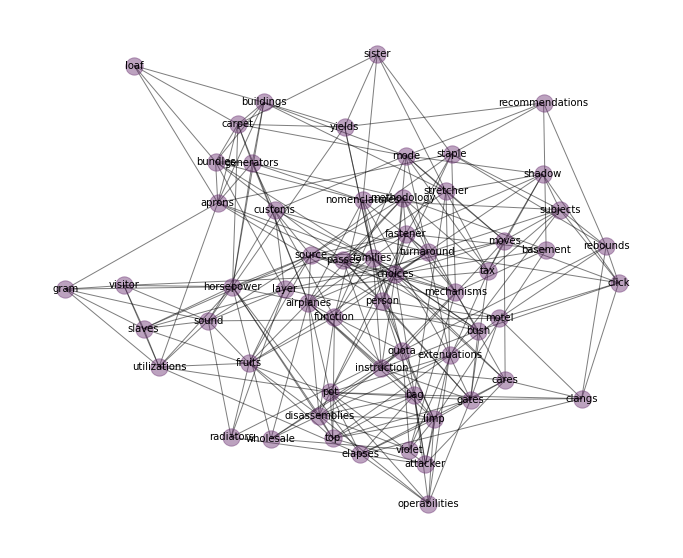

In [ ]:
pos = nx.fruchterman_reingold_layout(G_msds);

plt.figure(figsize=(12,10));
plt.axis('off');
nx.draw_networkx_nodes(G_msds, pos, node_size=300, 
                       node_color='#6B3272', alpha=0.45);
nx.draw_networkx_edges(G_msds, pos, alpha=0.500);
nx.draw_networkx_labels(G_msds, pos, font_color='black', 
                        font_size=10);
plt.show();

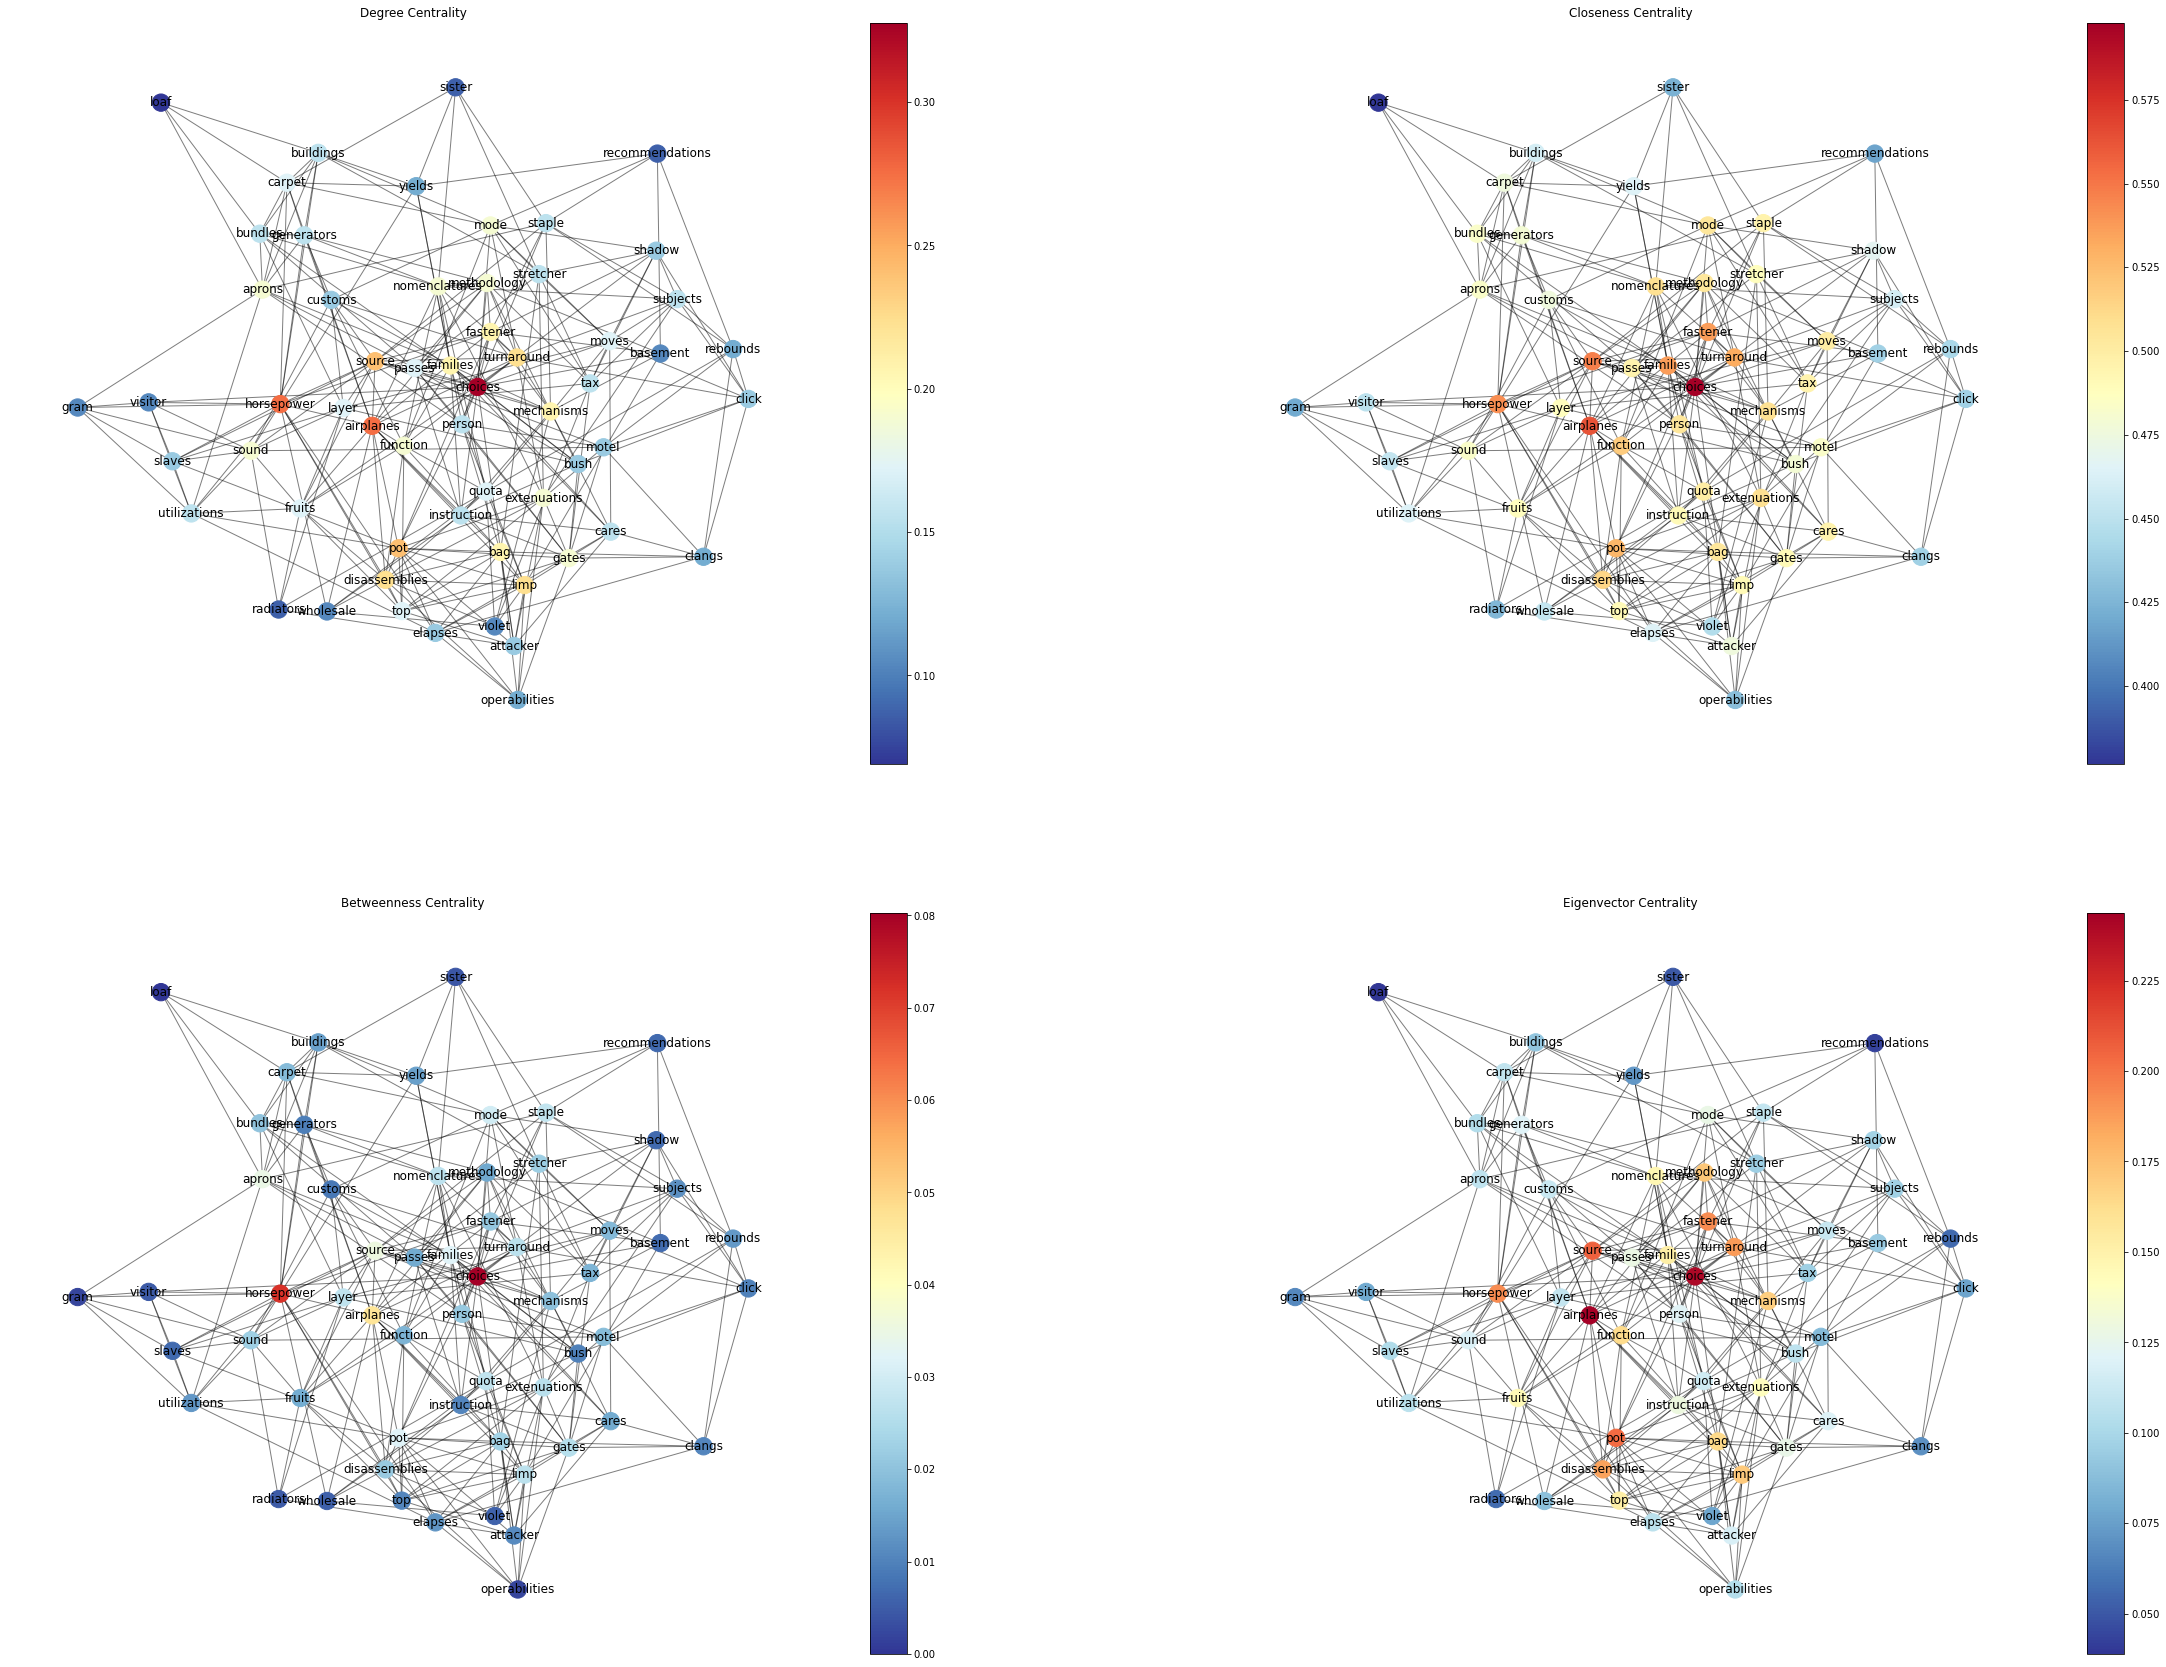

In [ ]:
network_name = G_msds

fig = plt.figure(figsize=(40,30)); #create/define a canvass

centralities = [list(nx.degree_centrality(network_name).values()), 
                list(nx.closeness_centrality(network_name).values()), 
                list(nx.betweenness_centrality(network_name).values()),
                list(nx.eigenvector_centrality(network_name).values())]
                
titles = ['Degree Centrality', 'Closeness Centrality', 
          'Betweenness Centrality', 'Eigenvector Centrality']

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1); #position of the nodes, if odd -> right side

    nc = nx.draw_networkx_nodes(network_name, pos, node_size=300, cmap=plt.cm.RdYlBu_r,
                            node_color=centralities[i]); #node color, node color is the centrality of i
    nx.draw_networkx_edges(network_name, pos, alpha=0.500); #draw edges
    nx.draw_networkx_labels(network_name, pos, font_color='black'); #draw labels
    plt.title(titles[i]);
    plt.axis('off');
    plt.colorbar(nc);

plt.show();

In [ ]:
nx.degree_centrality(G_msds).keys()

dict_keys(['methodology', 'fastener', 'loaf', 'sister', 'generators', 'source', 'moves', 'extenuations', 'stretcher', 'quota', 'aprons', 'slaves', 'wholesale', 'basement', 'clangs', 'instruction', 'bush', 'pot', 'rebounds', 'top', 'click', 'shadow', 'buildings', 'elapses', 'bundles', 'cares', 'limp', 'attacker', 'radiators', 'bag', 'person', 'yields', 'staple', 'layer', 'utilizations', 'mechanisms', 'recommendations', 'gram', 'tax', 'families', 'fruits', 'visitor', 'carpet', 'turnaround', 'subjects', 'passes', 'choices', 'function', 'mode', 'horsepower', 'disassemblies', 'violet', 'gates', 'operabilities', 'customs', 'airplanes', 'sound', 'nomenclatures', 'motel'])

In [ ]:
# Clustering Coefficient
clustering_dict = dict(nx.clustering(G_msds)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(G_msds)

In [ ]:
print(clustering_dict['choices'])
print(clustering_dict['horsepower'])
print(clustering_dict['airplanes'])

0.21052631578947367
0.225
0.2833333333333333


### Network Insights

Choices, horsepower, and airplanes have the most connections in the MSDS network. These students are the ones whom everyone talks to the most. Moreover, the three students are also central because of their connections to other influential nodes. 

Choices and horsepower ranked the highest in betweenness centrality, making them the most included in the different social groups in the MSDS cohort.  Because of this, they are likely to be aware of the situations within each learning team and speaking to them would likely yield insights about the situation within and between learning teams. 

Several students are central to the network based on closeness centrality. Among these are choices, horsepower, airplanes, source, and families. These students are closest to all the other nodes, making them efficient at disseminating information. 

Choices, Horsepower, and Airplanes are central in the network as they not only have the most number of friends, but they are also the most included in social groups and nearest to the rest of the cohort. These characteristics make them candidates for "super spreaders" of diseases. Removing them from the chain of transmission via quarantine or vaccination priority would significantly reduce the virus spread. The clustering coefficients of these super spreaders range between 0.2 to 0.3, indicating weak ties among their immediate networks. Targeting and monitoring these students in disease prevention programs would be key to prevent the spread of diseases in their respective clusters and to the cohort as a whole. 






### **3. If we're studying traffic flow of Metro Manila, which centrality measure is the most apt to use? Why?**

In studying the traffic flow in Metro Manila, the transportation network could be represented by a bipartite network whose nodes could be the cities and roads. Cities are linked if they are connected to the same road, while roads are linked if they are connected to the same city. 

Using this representation, the degree centrality of a node refers to the number of cities connected to it. These cities could have the highest population and the most number of employment opportunities. While this might be indicative of the volume of vehicles going in and out of these nodes, it is not conclusive to explain the bottlenecks occurring in the flow of vehicles between cities. The closeness centrality of a city refers to its proximity in with respect to others which could be useful in determining the inter-city travel time. 

Betweenness centrality would be the most appropriate metric to use in studying traffic flow because it captures the road's role in linking one location to another. It counts the number of times a particular road links two other locations such that their distance is minimized. For example, a person from Kalookan needs to pass through EDSA to go to Makati, BGC, or Pasay City. Because EDSA is most included in the traffic flow and alternatives are not present, there is a high concentration of vehicles in this node, making it prone to traffic congestions when its capacity is insufficient given the high volume of vehicles. Having an insight as to which roads have high betweenness centralities would be useful for creating alternative routes to reduce congestion.

### **4. Community Detection - Wikipedia Math Network** 

Analyze the [Wikipedia math network](https://drive.google.com/file/d/12VD-PcAhZqkRQw_Ex3O0_LO7SeD9aeJs/view?usp=sharing) (`enwiki_math.graphml`). What are the topics of the different communities? (*Treat the network as undirected and remove self loops. You may just sample the whole network since it's too large*). To sample, you may use

```python
wiki_subnet = nx.k_core(W, k=30)
```
where `W` is your whole wiki network.

How to read a graphml file? [Check this out](https://networkx.org/documentation/stable/reference/readwrite/graphml.html).



*   Limit the nodes with at least 30 degree
*   Run the comm detection algo



In [ ]:
wiki = nx.read_graphml (data_dir + 'enwiki_math.graphml')
wiki = wiki.to_undirected (wiki)
wiki.remove_edges_from(nx.selfloop_edges(wiki))
wiki_core = nx.k_core(wiki, k=30)

wiki_part = community.community_louvain.best_partition(wiki_core, random_state=27)

Nodes:  1323
Edges:  47415
Average degree:  71.6780045351474
Minimum degree:  30
Maximum degree:  663


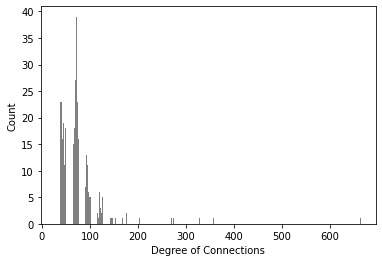

Average Network Clustering:  0.6765200760366198
Average Path length:  2.297844604306675
Network Diameter:  4


In [ ]:
network_name = wiki_core

# Size
L = network_name.size()

# Order
N = network_name.order()

# Average Degree
avg_degree = 2*float(L) / N

print ('Nodes: ', N)
print ('Edges: ', L)
print ('Average degree: ', avg_degree)

# Degree Distribution
deg_list = list(nx.degree(network_name))
deg_only_list = []

for node, deg in deg_list:
  deg_only_list.append(deg)

k_min = np.min(deg_only_list)
k_max = np.max(deg_only_list)
k_avg = np.mean(deg_only_list)

print ('Minimum degree: ', k_min)
print ('Maximum degree: ', k_max)
#print ('Average degree: ', k_avg)

deg = pd.Series(deg_only_list)
labels, counts = np.unique(deg, return_counts = True)

plt.bar(labels, counts, color='gray', 
        width=0.5, align='center')
plt.xlabel('Degree of Connections')
plt.ylabel('Count')
plt.show()

# Clustering Coefficient
clustering_dict = dict(nx.clustering(network_name)) # Clustering Coefficient per Node
ave_clustering = nx.average_clustering(network_name)

print('Average Network Clustering: ', ave_clustering)

# Characteristic Path Length
path_length = dict(nx.all_pairs_shortest_path_length(network_name))
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length

print('Average Path length: ', average_shortest_path_length(network_name))
print('Network Diameter: ', nx.diameter(network_name))

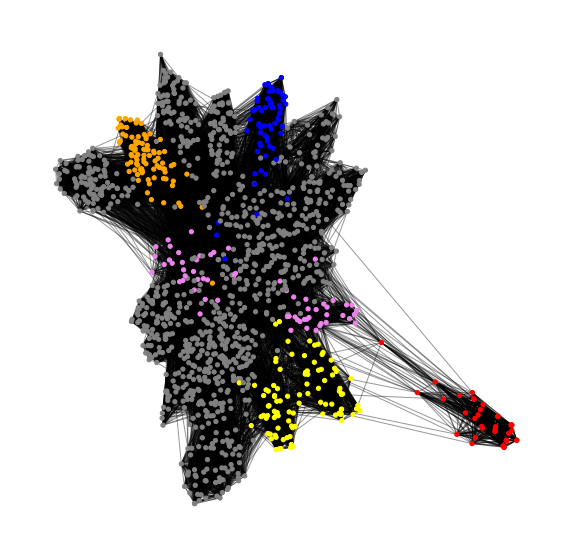

In [ ]:
for k, v in wiki_part.items():
    wiki_core.nodes()[k]['louvain-val'] = v

mypalette = ['blue', 'red', 'yellow', 'orange', 'violet'] + 100 * ['grey']
colors = [mypalette[wiki_core.nodes()[node]['louvain-val']] for node in wiki_core.nodes()]

plt.figure(figsize=(10,10))
plt.axis('off')
pos = nx.spring_layout(wiki_core, scale=3)
nx.draw_networkx_nodes(wiki_core, pos, node_color=colors, node_size=18, label=True)
nx.draw_networkx_edges(wiki_core, pos, alpha=0.4)

In [ ]:
wiki_core.nodes()

NodeView(('23543', '12012158', '2950611', '27001600', '48740', '14205', '301915', '31046646', '8878908', '48460141', '38361378', '4305817', '3011234', '1751626', '5705', '1160186', '79150', '1944319', '23003425', '321913', '1782511', '54894', '298763', '1739664', '245933', '973430', '1475381', '24000364', '293606', '610184', '24797', '26066377', '415974', '18967255', '43628228', '6129609', '5176', '50489556', '17741', '195684', '10780372', '22304790', '15698614', '1190470', '775', '48001679', '45468', '2932424', '589307', '860507', '48705535', '2060863', '3942', '45715334', '53561047', '165733', '59545', '3632522', '4097065', '43395', '998087', '3149881', '1591774', '1597019', '21573591', '40997365', '24133', '24985094', '7964', '15883418', '1710903', '2148532', '2875272', '11585295', '43476', '355814', '1782310', '5971818', '3326054', '3578468', '19727024', '51429', '52247', '3180285', '23275', '2070195', '1652651', '28952622', '130526', '1159299', '5941535', '39771079', '80442', '386

In [ ]:
attrib = pd.DataFrame(nx.get_node_attributes(wiki_core, "title").items())
attrib.rename(columns = {0: 'Node', 1: 'title'}, inplace = True)
print(len(attrib))

1323


In [ ]:
attrib.head()

,Node,title
0,23543,Probability_distribution
1,12012158,List_of_optimization_software
2,2950611,Matthew_Stephens_(statistician)
3,27001600,Śaṅkaranārāyaṇa
4,48740,Henri_Poincaré


In [ ]:
part_df = pd.DataFrame(wiki_part.items())
part_df.rename(columns = {0: 'Node', 1: 'Community'}, inplace = True)
print(len(part_df))

1323


In [ ]:
part_df.head()

,Node,Community
0,23543,2
1,12012158,1
2,2950611,2
3,27001600,3
4,48740,4


In [ ]:
# Merge
comm_df = pd.merge(attrib, part_df, on = 'Node')
print(len(comm_df))

1323


In [ ]:
comm_df.head()

,Node,title,Community
0,23543,Probability_distribution,2
1,12012158,List_of_optimization_software,1
2,2950611,Matthew_Stephens_(statistician),2
3,27001600,Śaṅkaranārāyaṇa,3
4,48740,Henri_Poincaré,4


In [ ]:
comm_summary = pd.DataFrame(comm_df['Community'].value_counts().sort_values())
comm_summary.rename(columns = {'Community': 'Size'}, inplace=True)
comm_summary['Community'] = comm_summary.index 
comm_summary.reset_index(drop=True, inplace = True)
comm_summary['Sample Titles'] = ''

for i in range(len(comm_summary)):
  sample_titles = comm_df.loc[comm_df['Community'] == comm_summary['Community'][i], ['title']].head().values.flatten().tolist()
  comm_summary['Sample Titles'][i] = sample_titles

In [ ]:
comm_summary

,Size,Community,Sample Titles
0,38,1,"[List_of_optimization_software, LINDO, FICO_Xp..."
1,57,10,"[Gilbert_Ames_Bliss, Leon_Henkin, Guido_Weiss,..."
2,62,4,"[Henri_Poincaré, Feigenbaum_constants, Audrey_..."
3,70,0,"[Algorithm, Sagrada_Família, Plastic_number, A..."
4,71,9,"[Ritabrata_Munshi, Palash_Sarkar, Mihir_Baran_..."
5,72,11,"[Herbert_A._Simon, Glossary_of_game_theory, Ma..."
6,84,5,"[Menaechmus, Proclus, Boethius, Hippocrates_of..."
7,91,3,"[Śaṅkaranārāyaṇa, Bakhshali_manuscript, Aryabh..."
8,95,2,"[Probability_distribution, Matthew_Stephens_(s..."
9,102,8,"[De_Gradibus, Habash_al-Hasib_al-Marwazi, Al-K..."


In [ ]:
comm_df.loc[comm_df['Community'] == 11, ['title']].head()

,title
5,Herbert_A._Simon
26,Glossary_of_game_theory
33,Mathematical_economics
42,Stable_roommates_problem
45,Gérard_Cornuéjols


## Network Insights

Twelve communities were detected by the Louvain algorithm in the wikipedia math network. The largest cluster was Community 7 (Mathematical Theorems & Concepts), which is composed of 298 nodes. It is followed by Community 6 (Math Awards and Recepients), which indicates development in the field, perhaps due to increases in research funding & growing pool of mathematicians in the academe. Meanwhile the smallest cluster is Community 1 (Mathematical Softwares), having only 38 nodes. The topics of each network are as follows:


Community 0 - Applications of Maths in Arts

Community 1 - Mathematical Softwares & Programs 

Community 2 - Statistics (theories, statisticians, statistical concepts)

Community 3 - Indian Mathematicians

Community 4 - List of Mathematicians

Community 5 - Ancient Greek Mathematicians

Community 6 - Math Awards and Recepients

Community 7 - Mathematical Theorems and Concepts

Community 8 - Arab/Islam Mathematicians

Community 9 - Indian Mathematicians

Community 10 - American Mathematicians

Community 11 - 20th Century Mathematicians and their Theories (i.e. Game Theory)



Communities 3 and 9 are quite similar as they both include Indian Mathematicians. It would be interesting to investigate why these two communities were not grouped together. Aside from this, there is also a huge gap between the size of the Mathematical Theorems & Concepts (Community 7) community with that of the Mathemtical Softwares (Community 1). This could indicate the lack of math programs to execute and apply these theorems to various datasets. Projecting these two communities in a bi-partite layout may be performed to test this hypothesis.